In [1]:
from py3dbp import Packer, Bin, Item

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from collections import OrderedDict
from operator import getitem


def get_cube():   
    phi = np.arange(1,10,2)*np.pi/4
    Phi, Theta = np.meshgrid(phi, phi)

    x = np.cos(Phi)*np.sin(Theta)
    y = np.sin(Phi)*np.sin(Theta)
    z = np.cos(Theta)/np.sqrt(2)
    return x,y,z

def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

def get_max_depth(bin_used):
    max_width = 0.0
    max_height = 0.0
    max_depth = 0.0
    
    for item in bin_used.items:
        aux_width = float(item.position[0])+float(item.width)
        aux_height = float(item.position[1])+float(item.height)
        aux_depth = float(item.position[2])+float(item.depth)
        if max_width<aux_width:
            max_width=aux_width
        if max_height<aux_height:
            max_height=aux_height
        if max_depth<aux_depth:
            max_depth=aux_depth
    
    return max_width, max_height, max_depth

truck_list = list()
truck_list.append(Bin('bin1', 1, 1, 1, 7000.0))
truck_list.append(Bin('bin2', 3, 3, 14, 7000.0))
truck_list.append(Bin('bin3', 1, 1, 7, 7000.0))
truck_list.append(Bin('bin4', 1, 1, 7, 7000.0))
truck_list.append(Bin('bin5', 1, 1, 7, 7000.0))


client_dict = {}
client_dict["aacraa"]= {}

client_dict["aacraa"]["order"]=1
client_dict["aacraa"]["item_list"] = item_list_1 = list()

item_list_1.append(Item('50g [powder 1]', 1, 1, 1, 1,10))
item_list_1.append(Item('50g [powder 2]', 1, 1, 1, 1,10))
item_list_1.append(Item('50g [powder 3]', 1, 1, 1, 1))
item_list_1.append(Item('50g [powder 4]', 1, 1, 1, 1))
item_list_1.append(Item('50g [powder 5]', 1, 1, 1, 1))
item_list_1.append(Item('50g [powder 6]', 1, 1, 1, 1))
item_list_1.append(Item('50g [powder 7]', 1, 1, 1, 1))
item_list_1.append(Item('50g [powder 8]', 1, 1, 1, 1))

client_dict["bbcm"]= {}
client_dict["bbcm"]["order"]=2
client_dict["bbcm"]["item_list"] = item_list_2 = list()


item_list_2.append(Item('50g [powder 9]', 1, 1, 1, 1))
item_list_2.append(Item('50g [powder 10]', 1, 1, 1, 1))




client_dict = OrderedDict(sorted(client_dict.items(), key = lambda x: getitem(x[1], 'order')))


dict_readiness = {}

print(client_dict)

for truck in truck_list:
    aux_bin = truck
    print(f"Filling truck: {truck.name} ") ##This should be an uuid4
    dict_readiness[truck.name] = []
    
    
    
    for  client_name in client_dict.keys():
        print(f"Filling with client: {client_name} ")
        
        client_value = client_dict[client_name]["item_list"]
        
        if len(client_value)<=0:
            print("No item left in this client")
            continue
            
        if aux_bin.depth<=0:
            print("No Space left in this truck for this client")
            break
        packer = Packer()
        packer.add_bin(aux_bin)
        
        
        for item_b in client_value:
            packer.add_item(item_b)
        
        packer.pack(bigger_first=True, distribute_items=True)
        
        max_width =  max_height = max_depth = 0
        
        for ber in packer.bins: ##Se supone q solo es un bin, pero iguals
            print("Getting MX")
            max_width, max_height, max_depth = get_max_depth(ber)
            print(f"MXW: {max_width} // MXH: {max_height} // MXD: {max_depth}  ")
        
        ###dp filter * agregar delta weight
        dx_depth = float(aux_bin.depth)-max_depth
        
        if max_depth>0:
            dict_readiness[aux_bin.name].append((aux_bin, max_depth))
            
        aux_bin = Bin(aux_bin.name, aux_bin.width, aux_bin.height, dx_depth, aux_bin.max_weight)##New aux_bin
        print(f"New mxd: {dx_depth}")
        
        for ber in packer.bins:
            for item_m in ber.items:
                print(f"Removing item: {item_m.string()}")
                client_value.remove(item_m)
                
        #if len(client)<=0:
        #    client_list.remove(client)

        

        
        







OrderedDict([('aacraa', {'order': 1, 'item_list': [<py3dbp.main.Item object at 0x7fea2b389700>, <py3dbp.main.Item object at 0x7fea2b389940>, <py3dbp.main.Item object at 0x7fea2b389550>, <py3dbp.main.Item object at 0x7fea2b920a00>, <py3dbp.main.Item object at 0x7fea2c7b6940>, <py3dbp.main.Item object at 0x7fea2c7c2b50>, <py3dbp.main.Item object at 0x7fea2c7c2b20>, <py3dbp.main.Item object at 0x7fea2c7e2f10>]}), ('bbcm', {'order': 2, 'item_list': [<py3dbp.main.Item object at 0x7fea2c7ec0a0>, <py3dbp.main.Item object at 0x7fea2c7e2df0>]})])
Filling truck: bin1 
Filling with client: aacraa 
Echo test
Total items: 8
Items: [<py3dbp.main.Item object at 0x7fea2b389700>, <py3dbp.main.Item object at 0x7fea2b389940>, <py3dbp.main.Item object at 0x7fea2b389550>, <py3dbp.main.Item object at 0x7fea2b920a00>, <py3dbp.main.Item object at 0x7fea2c7b6940>, <py3dbp.main.Item object at 0x7fea2c7c2b50>, <py3dbp.main.Item object at 0x7fea2c7c2b20>, <py3dbp.main.Item object at 0x7fea2c7e2f10>]
Getting MX
MX

In [2]:
print(dict_readiness)

{'bin1': [(<py3dbp.main.Bin object at 0x7fea2b407b50>, 1.0)], 'bin2': [(<py3dbp.main.Bin object at 0x7fea2b407b80>, 2.0), (<py3dbp.main.Bin object at 0x7fea2c7ecf70>, 1.0)], 'bin3': [], 'bin4': [], 'bin5': []}


In [3]:
def get_cube():   
    phi = np.arange(1,10,2)*np.pi/4
    Phi, Theta = np.meshgrid(phi, phi)

    x = np.cos(Phi)*np.sin(Theta)
    y = np.sin(Phi)*np.sin(Theta)
    z = np.cos(Theta)/np.sqrt(2)
    return x,y,z

def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

::::::::::: bin2(3.000x3.000x14.000, max_weight:7000.000) vol(126.000)
FITTED ITEMS:
====>  50g [powder 2](1.000x1.000x1.000, weight: 1.000) pos([0, 0, Decimal('0')]) rt(0) vol(1.000)
====>  50g [powder 3](1.000x1.000x1.000, weight: 1.000) pos([Decimal('1.000'), 0, Decimal('0')]) rt(0) vol(1.000)
====>  50g [powder 4](1.000x1.000x1.000, weight: 1.000) pos([Decimal('2.000'), 0, Decimal('0')]) rt(0) vol(1.000)
====>  50g [powder 5](1.000x1.000x1.000, weight: 1.000) pos([0, Decimal('1.000'), Decimal('0')]) rt(0) vol(1.000)
====>  50g [powder 6](1.000x1.000x1.000, weight: 1.000) pos([0, 0, Decimal('1.000')]) rt(0) vol(1.000)
====>  50g [powder 7](1.000x1.000x1.000, weight: 1.000) pos([Decimal('1.000'), 0, Decimal('1.000')]) rt(0) vol(1.000)
====>  50g [powder 8](1.000x1.000x1.000, weight: 1.000) pos([Decimal('2.000'), 0, Decimal('1.000')]) rt(0) vol(1.000)
::::::::::: bin2(3.000x3.000x12.000, max_weight:7000.000) vol(108.000)
FITTED ITEMS:
====>  50g [powder 9](1.000x1.000x1.000, weight: 1

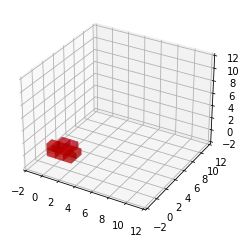

In [4]:
aux_depth=0
from decimal import Decimal

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x,y,z = get_cube()
i=0
for berax in dict_readiness["bin2"]:
    ber = berax[0]
    
    print(":::::::::::", ber.string())

    print("FITTED ITEMS:")
    cmap = get_cmap(len(ber.items))
    
    cmpaix = 0
    for item in ber.items:
        item.position[2]=Decimal(item.position[2])+Decimal(aux_depth)
        print("====> ", (item.string()))
        
        
        a = float(item.width)*1.0
        c = float(item.height)*1.0
        b = float(item.depth)*1.0  
        
        d_a = float(item.position[0])*1.0
        d_c = float(item.position[1])*1.0
        d_b = float(item.position[2])*1.0
        ax.plot_surface(x*a+d_a, y*b+d_b, z*c+d_c,  linewidth=0.1, color=cmap(i), alpha=0.3)
    aux_depth=berax[1]
    i=i+4

ax.set_xlim(-2,12)
ax.set_ylim(-2,12)
ax.set_zlim(-2,12)
plt.show()
        